# 데이터 상관관계 분석

# 상관분석과 상관계수
- 우리는 일상생활에서 “키가 크면 발이 크다”, “교육수준이 높을수록 자녀의 대학 진학률이 높다”등의 이야기를 많이 한다. 
- 이러한 두 개의 변수 ‘키’와 ‘발’, ‘교육수준’과 ‘자녀 대학 진학률’간의 관계가 어떠한 관계를 가지고 있는지 성향을 분석하는 것이 “상관분석”이다. 
- 이를 ‘산포도’ 또는 ‘산점도’라는 그래프로 그리면 직관적으로 두 변수간의 관계를 파악할 수 있다. 
- 예) 어느 집단의 키와 발크기
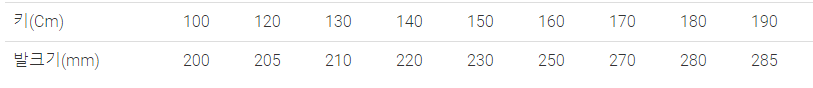

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib

font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
#plt.rcParams['figure.figsize']=(6,4)
plt.figure(figsize=(6,4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# 산포도 그래프 작성(키와 발크기)

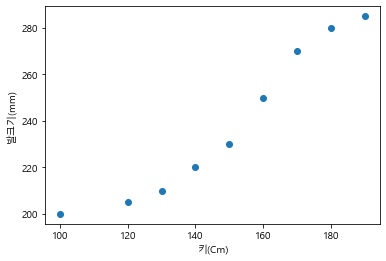

In [2]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
plt.scatter(height, foot_size)
plt.xlabel('키(Cm)')
plt.ylabel('발크기(mm)')
plt.show()

# 산포도 그래프 작성(산의 높이에 따른 기온 변화)
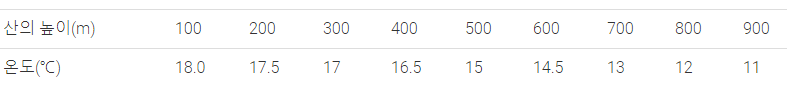

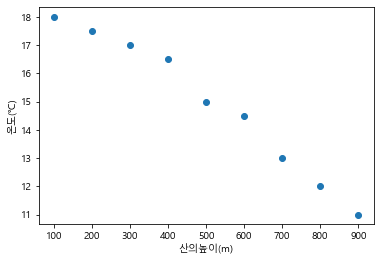

In [3]:
h = [100, 200, 300, 400, 500, 600, 700, 800, 900]
t = [18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
plt.scatter(h, t)
plt.xlabel('산의높이(m)')
plt.ylabel('온도(℃)')
plt.show()

In [4]:
# 산포도 그래프 작성(상관관계가 없는 데이터)

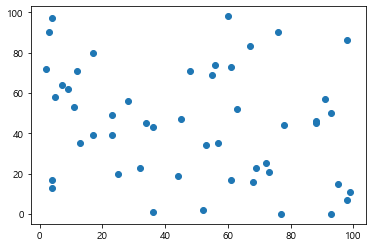

In [5]:
# randint(start, end, size) start:시작, end:끝, size:갯수인 임의의 정수를 생성 
random_x = np.random.randint(0, 100, 50) 
random_y = np.random.randint(0, 100, 50)
plt.scatter(random_x, random_y)
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.966126323516351


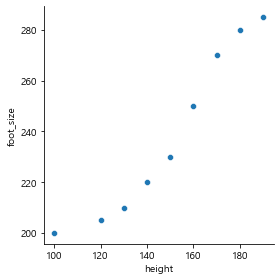

In [7]:
df=pd.DataFrame({'height':height,'foot_size':foot_size})
print(df.height.corr(df.foot_size))
sns.relplot(x='height',y='foot_size',data=df, height=4)
plt.show()

-0.9879199164035133


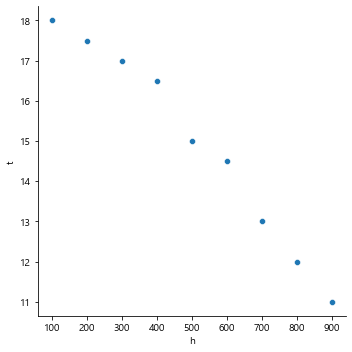

In [8]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))
sns.relplot(x='h',y='t',data=df)

-0.2373897207535466


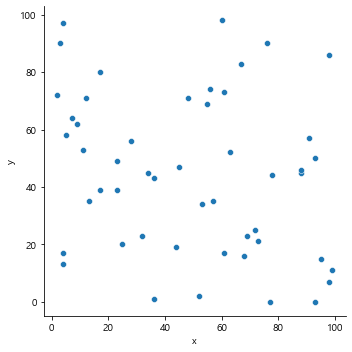

In [9]:
df=pd.DataFrame({'x':random_x, 'y':random_y})
print(df.x.corr(df.y))
sns.relplot(x='x',y='y',data=df)

In [10]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


0.6757341092113646


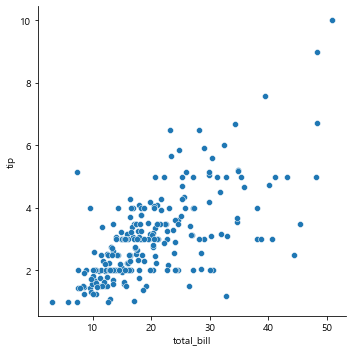

In [27]:
print(tips.total_bill.corr(tips.tip)) # 상관관계 수 출력 (0.6이상이면 높은 편)
sns.relplot(x='total_bill', y='tip', data=tips)

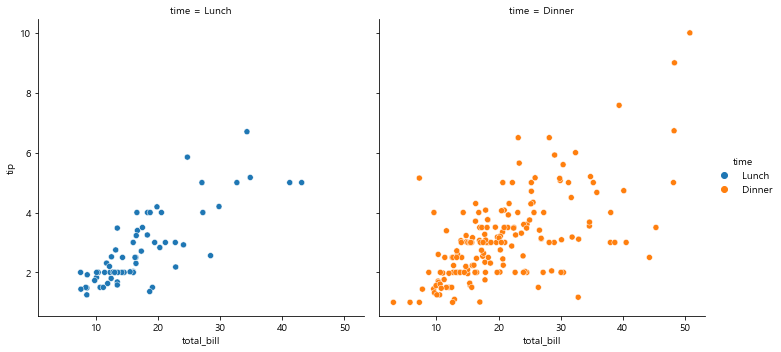

In [28]:
sns.relplot(x='total_bill', y='tip', col='time',data=tips, hue='time')

# 상관분석과 상관계수

- 상관계수
    - 상관분석에서는 x의 값이 증가함에 따라 y의 값이 증가하는 경우 우리는 “양의 상관관계”를 가지고 있다.
    - 상관 계수는 서로간의 데이터가 어느 정도의 근접도를 가지고 있는지 표현하는 방법

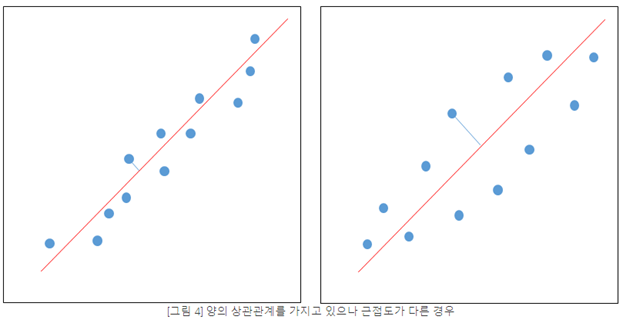

- 상관계수(기호 : r)
 - -1≤r≤1 의 값을 가짐
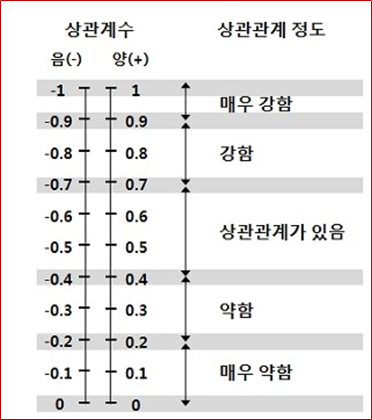

- 상관관계 분석식(모집단 전체의 상관계수 공식)
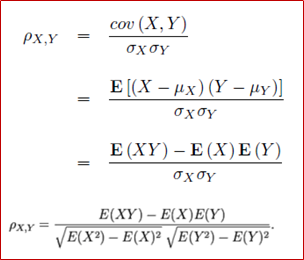

- 상관관계 분석식(표본: 일부 샘플들의 상관계수 공식)
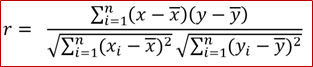

In [13]:
import math

def correlation(x, y):
    n = len(x)
    vals = range(n)
    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)    
    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt( ((n*x_sum_pow) - pow(x_sum, 2)) * ((n*y_sum_pow) - pow(y_sum, 2)))
    except :
        print("error")
        r = 0.0
    return r


In [14]:
h = [100, 200, 300, 400, 500, 600, 700, 800, 900]
t = [18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
print(h)
print(t)
print('상관분석:',correlation(h, t))

[100, 200, 300, 400, 500, 600, 700, 800, 900]
[18.0, 17.5, 17, 16.5, 15, 14.5, 13, 12, 11]
상관분석: -0.9879199164035135


In [15]:
print(random_x)
print(random_y)
print('상관분석:',correlation(random_x, random_y))

[93  4 88 98 36 13 99 45 69 23 25 98 78 17 93 44 91 28 48 12 61 56 67 61
 77 55 11 53 60 52  9 23  3 76 72 36  2  5 63  7 32 57 95 68 73 17 88 34
  4  4]
[50 97 45  7  1 35 11 47 23 49 20 86 44 39  0 19 57 56 71 71 73 74 83 17
  0 69 53 34 98  2 62 39 90 90 25 43 72 58 52 64 23 35 15 16 21 80 46 45
 13 17]
상관분석: -0.2373897207535466


# Pandas 사용 상관관계분석

In [16]:
df=pd.DataFrame({'h':h,'t':t})
print(df.h.corr(df.t))

-0.9879199164035133


In [17]:
df=pd.DataFrame({'x':random_x, 'y':random_y})
print(df.x.corr(df.y))

-0.2373897207535466


In [18]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
list=[height, foot_size]
df=pd.DataFrame(list).T
print(df)
corr=df.corr(method='pearson')
print(corr)

     0    1
0  100  200
1  120  205
2  130  210
3  140  220
4  150  230
5  160  250
6  170  270
7  180  280
8  190  285
          0         1
0  1.000000  0.966126
1  0.966126  1.000000


In [19]:
height = [100, 120, 130, 140, 150, 160, 170, 180, 190]
foot_size = [200, 205, 210, 220, 230, 250, 270, 280, 285]
weight=[25, 30, 38, 35, 40, 45, 55, 68, 70]
list=[height, foot_size,weight]
df=pd.DataFrame(list).T
print(df)
corr=df.corr(method='pearson')
print(corr)

     0    1   2
0  100  200  25
1  120  205  30
2  130  210  38
3  140  220  35
4  150  230  40
5  160  250  45
6  170  270  55
7  180  280  68
8  190  285  70
          0         1         2
0  1.000000  0.966126  0.952271
1  0.966126  1.000000  0.969807
2  0.952271  0.969807  1.000000


# 상관관계 시각화-heatmap

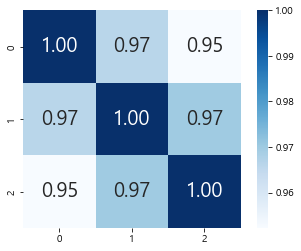

In [20]:
df_heatmap = sns.heatmap(corr,  #상관계수 값
                         cbar=True,  #사이드바 표시
                         annot=True,  # 실제값 화면에 표시여부
                         annot_kws={'size': 20},  #글자 크기
                         fmt='.2f',   #소수점 자리수 지징
                         square=True, # 정사각형으로 표시 여부
                         cmap='Blues')  #색장지정, Reds, Greens, Blues

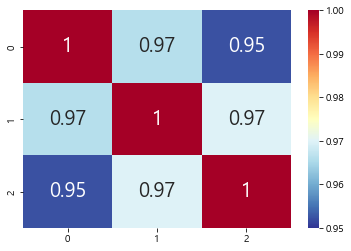

In [21]:
df_heatmap = sns.heatmap(corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

In [22]:
tips_corr=tips.corr(method='pearson')
print(tips_corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


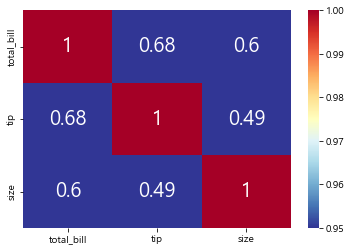

In [23]:
df_heatmap = sns.heatmap(tips_corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

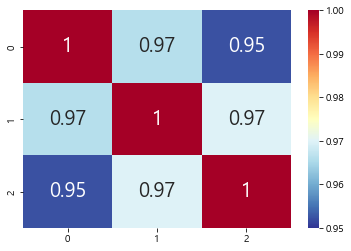

In [24]:
df_heatmap = sns.heatmap(corr, 
                         cbar=True, 
                         annot=True, 
                         annot_kws={'size': 20}, 
                         cmap='RdYlBu_r', #red, yellow, blue 생상으로 표시
                         vmin=0.95,vmax=1) # 색상 표시 최대값과 최소값

C:\Users\hsg55\AppData\Local\Temp\ipykernel_6668\2943552654.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool) # 삼각형 마스크 만들기 위쪽 삼각형에 False


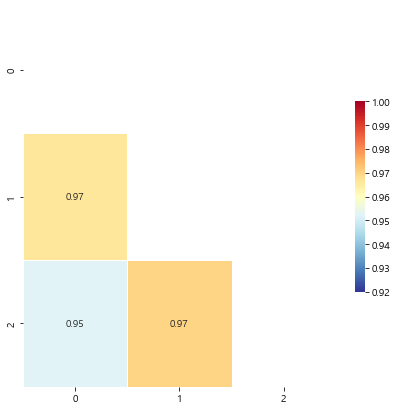

In [36]:
import numpy as np
fig, ax=plt.subplots(figsize=(7,7))
mask=np.zeros_like(corr, dtype=np.bool) # 삼각형 마스크 만들기 위쪽 삼각형에 False
mask[np.triu_indices_from(mask)]=True #아래쪽 삼각형에 True
df_heatmap = sns.heatmap(
    corr, 
    cbar_kws={'shrink':.5}, # 컬라바 크기 절반으로 줄이기
    annot=True, 
    mask=mask, #표시하지 않는 마스크 부분 지정
    linewidth=.5, # 경계면 시선으로 구분하기
    cmap='RdYlBu_r', #red, yellow, blue 색상으로 표시
    vmin=0.92,vmax=1)